In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [ ]:
igdb_data = pd.read_csv("./Data/igdb_games.csv")[['id', 'category', 'created_at', 'genres', 'first_release_date', 'name', 'platforms']]
#igdb_data.columns
igdb_data.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,category,created_at,genres,first_release_date,name,platforms
0,33260,0,1495739021,"[15, 32]",1.459987e+09,The Fifth Expedition,"[3, 6]"
1,40104,0,1498435200,[5],5.364576e+08,Dogou Souken,[52]
2,85031,0,1517392813,[9],1.404346e+09,City Mysteries,[37]
3,161757,1,1628007985,NaN,NaN,Earth Defense Force: World Brothers - Riho Fut...,NaN
4,139538,0,1602368467,[32],1.525910e+09,sun machine,[82]
5,33284,0,1495670400,[32],1.457741e+09,One way to exit,[6]
6,89616,0,1519986874,"[9, 33]",NaN,Bubble Whirl Shooter,NaN
7,104748,0,1530489600,NaN,NaN,Space station - build your own ISS,NaN
8,146815,0,1620325446,[9],1.230682e+09,Parking Lot Maze,[6]
9,85450,0,1517356800,NaN,NaN,Transformers Prime: The Game,NaN


In [ ]:
vg_game_data = pd.read_csv("./Data/vgchartz-7_7_2020.csv", encoding='latin1')[['title', 'console', 'genre', 'publisher', 'developer', 'vg_score', 'critic_score', 'user_score', 'release_date', 'total_shipped/sales']]
vg_game_data['logarithm_base2'] = np.log2(vg_game_data['total_shipped/sales'])
vg_game_data.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,title,console,genre,publisher,developer,vg_score,critic_score,user_score,release_date,total_shipped/sales,logarithm_base2
0,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,NaN,42.06,5.394377
1,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,3/22/2005,35.05,5.131343
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,10/16/2001,22.00,4.459432
3,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,9/17/2013,20.32,4.344828
4,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,10/23/1981,20.00,4.321928
5,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,NaN,9.7,NaN,11/18/2014,19.39,4.277241
6,Grand Theft Auto: San Andreas,PS2,Action,Rockstar Games,Rockstar North,NaN,9.5,NaN,10/26/2004,17.30,4.112700
7,Uncharted 4: A Thief's End,PS4,Action,Sony Interactive Entertainment,Naughty Dog,NaN,9.2,NaN,5/10/2016,16.25,4.022368
8,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,NaN,9.6,NaN,10/28/2002,16.15,4.013462
9,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,NaN,NaN,9/17/2013,15.86,3.987321


[]

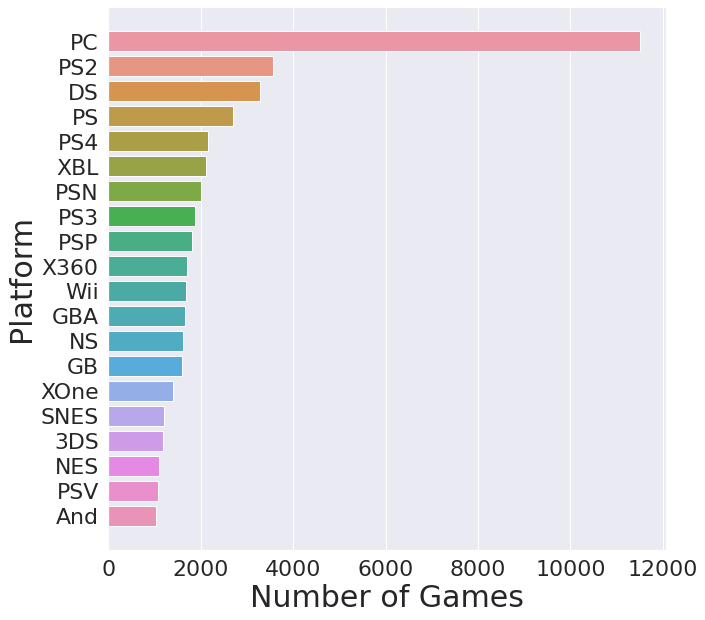

In [ ]:
platform_aggr = vg_game_data.groupby(['console']).count().reset_index().sort_values(ascending=False,by='title') 
sns.set(font_scale = 2, rc = {'figure.figsize':(10,10)})
ax = sns.barplot(x="title", y="console", data=platform_aggr.head(20))
ax.set_xlabel("Number of Games", fontsize = 30)
ax.set_ylabel("Platform", fontsize = 30)
plt.plot()

[]

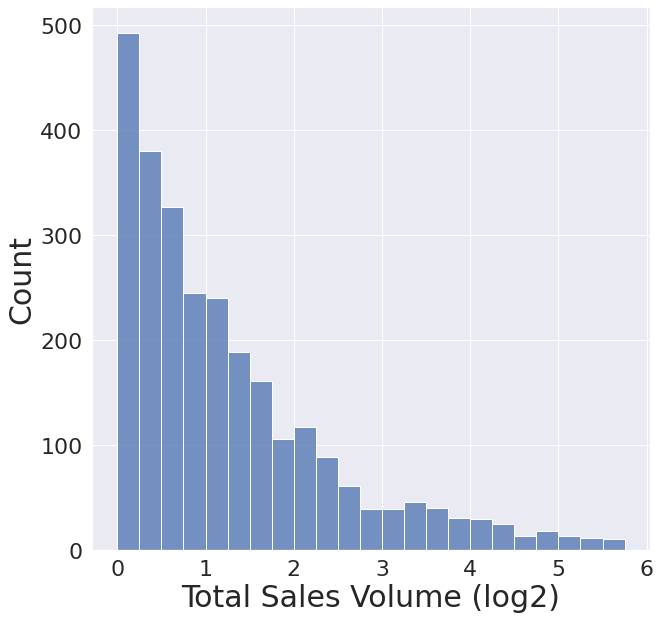

In [ ]:
sns.set(font_scale = 2, rc = {'figure.figsize':(10,10)})
bx = sns.histplot(x="logarithm_base2", data=vg_game_data, bins=[x/4 for x in range(0, 24)])
bx.set_xlabel("Total Sales Volume (log2)", fontsize = 30)
bx.set_ylabel("Count", fontsize = 30)
plt.plot()

In [ ]:
vg_game_data['release_date'] = vg_game_data['release_date'].str[-4:]

In [ ]:
vg_game_data.head(10)

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,release_date,total_shipped/sales,logarithm_base2
0,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,NaN,42.06,5.394377
1,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,2005,35.05,5.131343
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,2001,22.00,4.459432
3,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,2013,20.32,4.344828
4,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,1981,20.00,4.321928
5,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,NaN,9.7,NaN,2014,19.39,4.277241
6,Grand Theft Auto: San Andreas,PS2,Action,Rockstar Games,Rockstar North,NaN,9.5,NaN,2004,17.30,4.112700
7,Uncharted 4: A Thief's End,PS4,Action,Sony Interactive Entertainment,Naughty Dog,NaN,9.2,NaN,2016,16.25,4.022368
8,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,NaN,9.6,NaN,2002,16.15,4.013462
9,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,NaN,NaN,2013,15.86,3.987321


In [ ]:
aggregated_game_data = vg_game_data.groupby(['release_date','genre'])['total_shipped/sales'].sum().reset_index(name="total sales")
aggregated_game_data_clean = aggregated_game_data.pivot("genre", "release_date", "total sales").fillna(0)
aggregated_game_data_clean

release_date,1971,1973,1975,1977,1978,1979,1980,1981,1982,1983,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
genre,,,,,,,,,,,,,,,,,,,,,
Action,0.0,0.0,0.0,1.25,1.18,0.31,0.00,21.88,14.45,7.15,...,123.51,42.94,97.41,78.51,79.07,60.84,62.34,34.26,3.33,5.00
Action-Adventure,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,32.82,32.82,61.44,48.92,15.89,27.43,34.71,66.45,12.07,0.45
Adventure,0.0,0.0,0.0,0.00,1.30,0.00,0.00,0.00,0.00,0.00,...,33.84,11.07,15.59,9.54,13.36,12.54,9.27,14.69,0.38,0.13
Board Game,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.02,0.00,0.00,0.00,0.00,0.30,0.01,0.00,0.00
Education,65.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.09,0.11,0.00,0.00,0.00,0.00,0.00,0.00
Fighting,0.0,0.0,0.0,0.00,0.00,0.00,1.24,0.00,0.00,0.00,...,25.86,13.79,10.02,22.09,23.48,7.79,11.76,27.41,0.00,0.15
MMO,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.74,2.70,1.29,5.44,3.69,3.40,0.87,3.66,0.00,0.00
Misc,0.0,0.0,0.0,0.00,0.00,0.00,0.51,0.00,0.00,2.14,...,51.98,26.25,45.14,60.38,10.33,6.96,4.88,2.86,2.75,0.00
Music,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.17,19.13,10.01,7.31,9.08,5.79,3.18,2.91,0.90,0.15


In [ ]:
aggregated_game_data_clean = aggregated_game_data_clean.transform(lambda x: np.log(x+1))
aggregated_game_data_clean

release_date,1971,1973,1975,1977,1978,1979,1980,1981,1982,1983,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
genre,,,,,,,,,,,,,,,,,,,,,
Action,0.000000,0.0,0.0,0.810930,0.779325,0.270027,0.000000,3.130263,2.737609,2.098018,...,4.824386,3.782825,4.589142,4.375883,4.382901,4.124550,4.148517,3.562749,1.465568,1.791759
Action-Adventure,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.521052,3.521052,4.134206,3.910422,2.826722,3.347445,3.575431,4.211387,2.570320,0.371564
Adventure,0.000000,0.0,0.0,0.000000,0.832909,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.550766,2.490723,2.808800,2.355178,2.664447,2.605648,2.329227,2.753024,0.322083,0.122218
Board Game,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.019803,0.000000,0.000000,0.000000,0.000000,0.262364,0.009950,0.000000,0.000000
Education,4.189655,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.086178,0.104360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fighting,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.806476,0.000000,0.000000,0.000000,...,3.290638,2.693951,2.399712,3.139400,3.197856,2.173615,2.546315,3.346741,0.000000,0.139762
MMO,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.553885,1.308333,0.828552,1.862529,1.545433,1.481605,0.625938,1.539015,0.000000,0.000000
Misc,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.412110,0.000000,0.000000,1.144223,...,3.969914,3.305054,3.831680,4.117084,2.427454,2.074429,1.771557,1.350667,1.321756,0.000000
Music,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.153732,3.002211,2.398804,2.117460,2.310553,1.915451,1.430311,1.363537,0.641854,0.139762


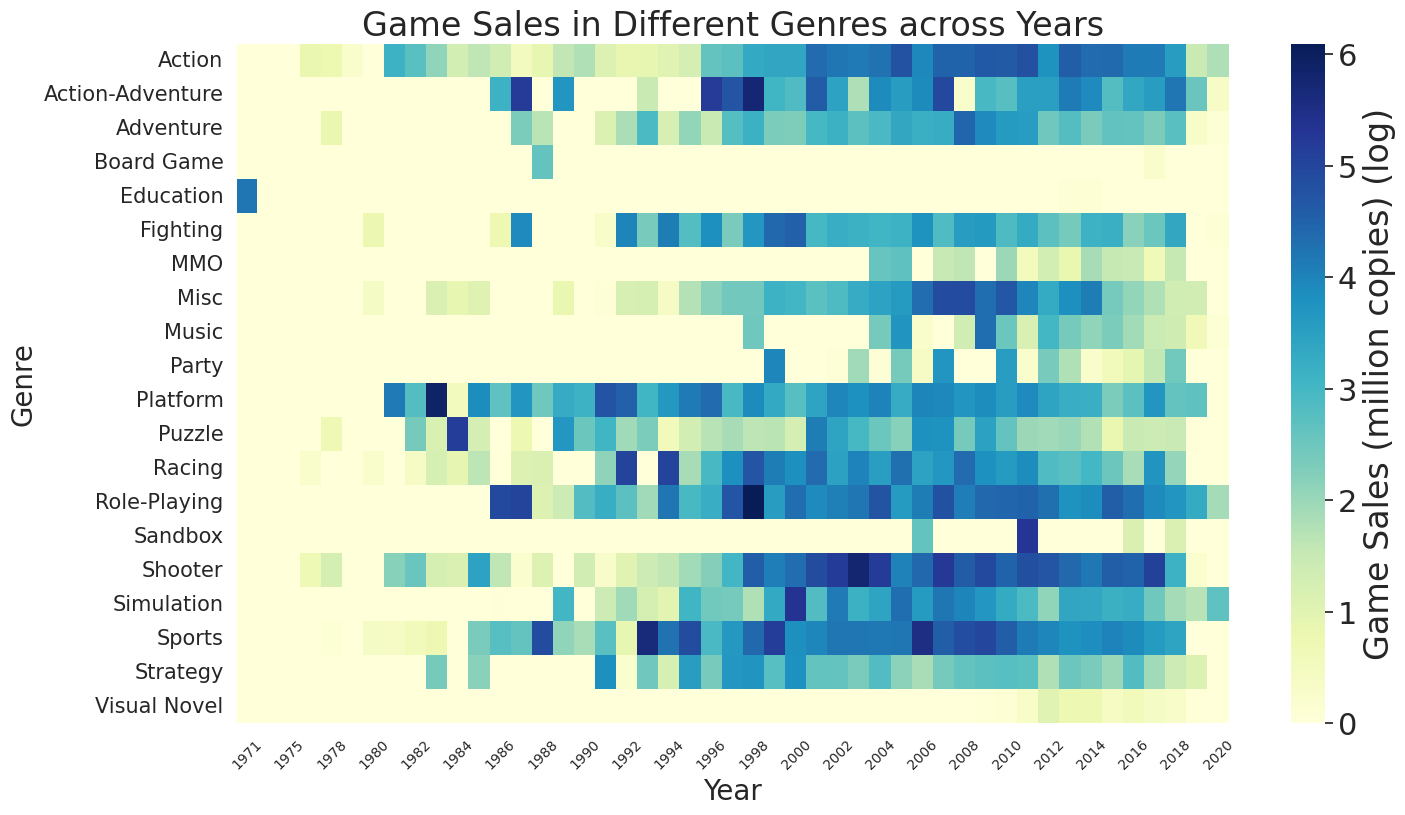

In [ ]:
plt.figure(figsize=(16,9), dpi=100)
ax = sns.heatmap(aggregated_game_data_clean, cbar_kws={'label': 'Game Sales (million copies) (log)'}, cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Genre", fontsize=20)
ax.set_title("Game Sales in Different Genres across Years", fontsize = 24)
plt.show()

Plot of gamesales from 19xx to 20xx by genres

In [ ]:
er_comments = pd.read_csv("./Data/ER_comments.csv", encoding='latin1')

In [ ]:
er_comments

,Damn dogs.
0,Lordswornâs greatsword cuz o havenât tried...
1,Theres a helmet as well its where the boulder ...
2,I ran through then ate a berry.
3,Oh so he would only be attacked with one weapon?
4,No? Marika told Hoarah Loux to leave the lands...
...,...
99994,Iâve been addicted to guard counter ever sin...
99995,[removed]
99996,Is it those tall skinny dudes with curved swor...
99997,Get a life bro.ffs.


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(" ".join([comment for comment in er_comments["Damn dogs."]]))

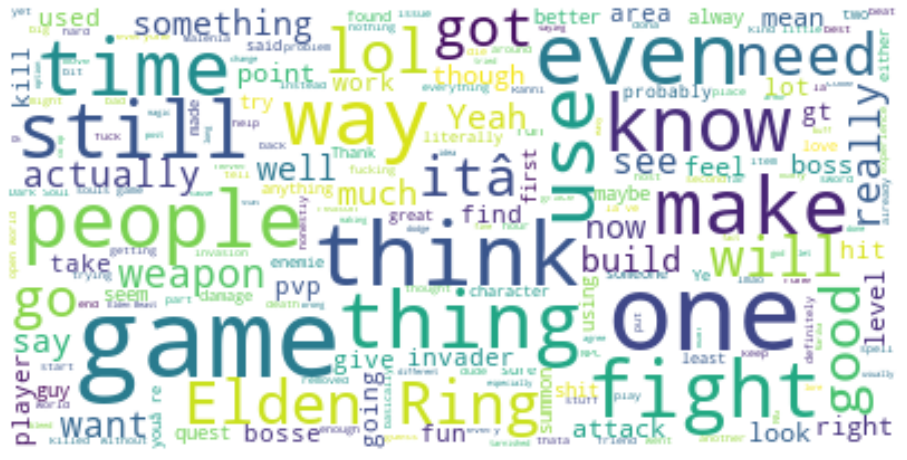

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
print(wc.words_.keys())

dict_keys(['game', 'one', 'think', 'even', 'time', 'make', 'way', 'thing', 'people', 'still', 'use', 'fight', 'know', 'Elden Ring', 'lol', 'need', 'itâ', 'go', 'got', 'will', 'good', 'weapon', 'really', 'actually', 'want', 'see', 'something', 'now', 'well', 'much', 'build', 'say', 'Yeah', 'though', 'point', 'right', 'feel', 'attack', 'mean', 'level', 'boss', 'look', 'invader', 'player', 'pvp', 'bosse', 'hit', 'find', 'gt', 'kill', 'lot', 'take', 'give', 'work', 'going', 'area', 'used', 'fun', 'maybe', 'first', 'try', 'summon', 'better', 'quest', 'alway', 'shit', 'guy', 'using', 'seem', 'probably', 'literally', 'anything', 'run', 'youâ re', 'found', 'sure', 'Ye', 'damage', 'either', 'made', 'great', 'Thank', 'character', 'enemie', 'two', 'said', 'least', 'love', 'someone', 'everything', 'without', 'Iâ', 'never', 'thought', 'spell', 'souls game', 'killed', 'invasion', 'help', 'put', 'NPC', 'Malenia', 'bad', 'end', 'Dark Soul', 'reason', 'hard', 'Iâ ve', 'around', 'back', 'start', 'item',

In [ ]:
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def remove_duplicate(words):
  return list(set(words))

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
phrase = " ".join(wc.words_.keys())

In [ ]:
stop_words = set(stopwords.words('english'))

clean_string = phrase.replace(",","")

curse_words = ["fuck", "shit", "ass", "fucking"]

words = clean_string.split()


words = remove_duplicate(words)

words = [word for word in words if word not in curse_words]

cleaned_lines = dict()

pos_words = list()
neg_words = list()



In [ ]:
sia = SentimentIntensityAnalyzer()

for r in words:
  if not r.lower() in stop_words:
    neg_polarity = sia.polarity_scores(r)['neg']
    pos_polarity = sia.polarity_scores(r)['pos']
    cpd_polarity = sia.polarity_scores(r)['compound']
    
    sentiment = (neg_polarity+pos_polarity)*cpd_polarity

    if sentiment != 0:
      cleaned_lines[r]=sentiment

In [ ]:
print(cleaned_lines)
print(type(cleaned_lines))

{'good': 0.4404, 'died': -0.5574, 'lost': -0.3182, 'nice': 0.4215, 'hard': -0.1027, 'well': 0.2732, 'kill': -0.6908, 'leave': -0.0516, 'damage': -0.4939, 'hell': -0.6808, 'weird': -0.1779, 'grace': 0.4215, 'better': 0.4404, 'vigor': 0.2732, 'fighting': -0.3612, 'spam': -0.3612, 'matter': 0.0258, 'cool': 0.3182, 'fought': -0.3182, 'clearly': 0.4019, 'fight': -0.3818, 'difficulty': -0.34, 'kind': 0.5267, 'suck': -0.4404, 'clear': 0.3818, 'fine': 0.2023, 'gt': 0.2732, 'combat': -0.34, 'hand': 0.4939, 'certain': 0.2732, 'agree': 0.3612, 'reward': 0.5719, 'miss': -0.1531, 'Yeah': 0.296, 'lol': 0.4215, 'Nah': -0.1027, 'pretty': 0.4939, 'strength': 0.4939, 'love': 0.6369, 'definitely': 0.4019, 'ruin': -0.5859, 'worth': 0.2263, 'super': 0.5994, 'wish': 0.4019, 'RoB': -0.5574, 'wrong': -0.4767, 'missed': -0.296, 'weapon': -0.296, 'best': 0.6369, 'help': 0.4019, 'attack': -0.4767, 'damn': -0.4019, 'bad': -0.5423, 'easily': 0.34, 'strong': 0.5106, 'death': -0.5994, 'top': 0.2023, 'dead': -0.6486,

In [ ]:
for key, value in cleaned_lines.items():
  if(value>0):
    pos_words.append(key)
  else:
    neg_words.append(key)

In [ ]:
print(pos_words)
print(neg_words)

['good', 'nice', 'well', 'grace', 'better', 'vigor', 'matter', 'cool', 'clearly', 'kind', 'clear', 'fine', 'gt', 'hand', 'certain', 'agree', 'reward', 'Yeah', 'lol', 'pretty', 'strength', 'love', 'definitely', 'worth', 'super', 'wish', 'best', 'help', 'easily', 'strong', 'top', 'care', 'play', 'honestly', 'god', 'played', 'sure', 'great', 'huge', 'easy', 'Greater', 'Thank', 'lmao', 'challenge', 'enjoy', 'ok', 'okay', 'number', 'feeling', 'want', 'haha', 'easier', 'friend', 'true', 'amazing', 'allow', 'straight', 'win', 'fair', 'fun', 'playing', 'interesting', 'hope']
['died', 'lost', 'hard', 'kill', 'leave', 'damage', 'hell', 'weird', 'fighting', 'spam', 'fought', 'fight', 'difficulty', 'suck', 'combat', 'miss', 'Nah', 'ruin', 'RoB', 'wrong', 'missed', 'weapon', 'attack', 'damn', 'bad', 'death', 'dead', 'drop', 'stupid', 'broken', 'annoying', 'Idk', 'difficult', 'hate', 'killing', 'fire', 'war', 'enemy', 'killed', 'problem', 'sorry', 'die', 'bullshit', 'stop']


In [ ]:
color_words_dict = {'blue': pos_words, 'orange': neg_words}

In [ ]:
class AssignColor(object):
  def __init__(self, color_words_dict, default):
    self.color_words_dict = [(get_single_color_func(color), set(words)) for (color, words) in color_words_dict.items()]
    self.default = get_single_color_func(default)

  def get_color(self, word):
    try:
      color = next(color for (color, words) in self.color_words_dict if word in words)
    except StopIteration:
      color = self.default
    
    return color

  def __call__(self, word, **kwargs):
    return self.get_color(word)(word, **kwargs)

In [ ]:
wc = WordCloud(width=1600, height=900, collocations=False, background_color = 'skyblue').generate(" ".join(words).lower())

grouped_color_func = AssignColor(color_words_dict,'white')
wc.recolor(color_func=grouped_color_func)

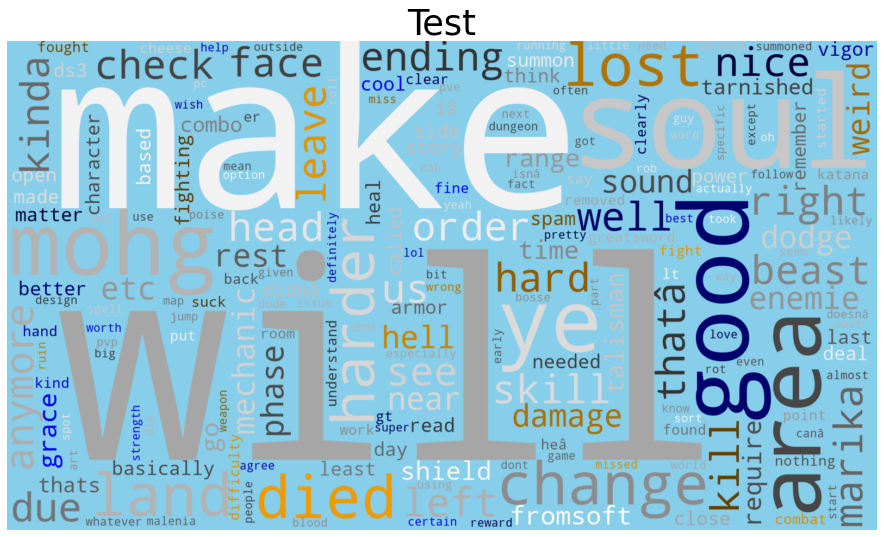

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Test", fontsize = 35)
plt.show()